### Imports
Packages needed for project

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import sys
sys.path.insert(0, '../src')
sys.path.insert(0, '../data')

import clean
import plot

%load_ext autoreload
%autoreload 2

IndentationError: expected an indented block (plots.py, line 60)

### Data Sample
First look at data

In [97]:
initial_data = clean.read_file('../data/master.csv')
initial_data


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


### Data Cleaning
Remove columns and records that will not be utilized. <br /> 
Additionally rename columns to allow for better human readablity.

In [98]:
data = clean.clean_data(initial_data, 2016, '5-14 years',
                            '05-14 years', ['country-year', 'HDI for year'])

data

,Country,Year,Sex,Age,Suicides,Population,Suicides_per_100K,Annual_GDP,GDP_per_Capita,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,05-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,05-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


### Initial Overview
Views of overall data without grouping or filters

<AxesSubplot:title={'left':'Global Suicide Rate'}, xlabel='Year', ylabel='Suicides per 100K'>

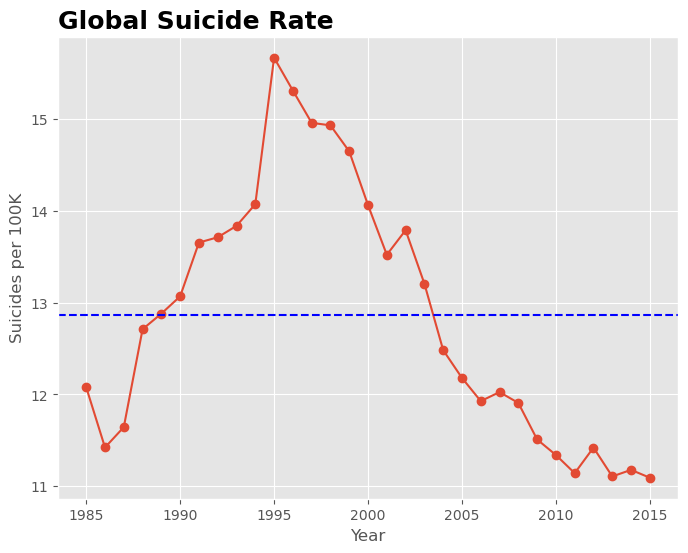

In [99]:
plt.style.use('ggplot')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


plot.annual_rate_plot(data, 'Global Suicide Rate', 'Year', 'Suicides per 100K')


In [5]:
# country_total = data.groupby('Country').sum().reset_index()

# country_total

# fig = px.choropleth(country_total, locations="Country", locationmode='country names',
#                     color="Suicides", # lifeExp is a column of gapminder
#                     hover_name="Country", # column to add to hover information
#                     color_continuous_scale='sunset')

# fig.show()

country_total = plot.column_total

### Male vs Female
Review entire dataset with male vs female by year

Text(0, 0.5, 'Suicides per 100K')

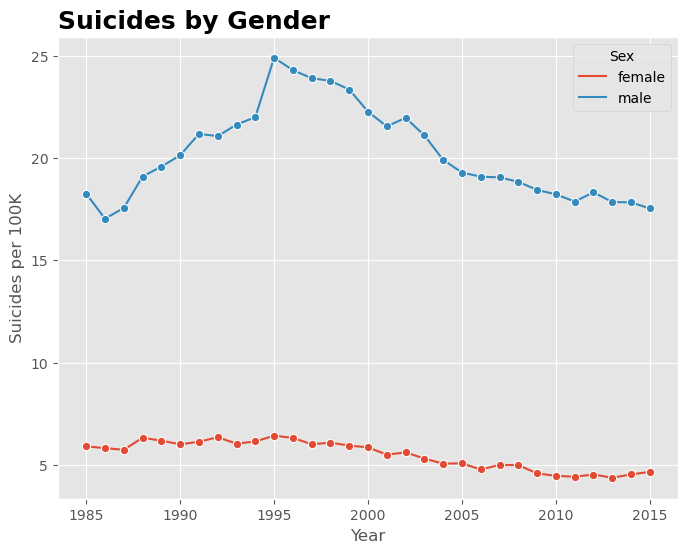

In [6]:
# new dataset grouped by the year and sex in order to seperate males and females
male_female = data.groupby(["Year", "Sex"]).agg("mean").reset_index()

fig, ax = plt.subplots(figsize=(8,6))

sns.lineplot(x="Year", y="Suicides_per_100K", hue='Sex', ax=ax, data=male_female, marker='o')
ax.set_title('Suicides by Gender', loc='left', fontsize=18, fontweight='bold')

ax.set_xlabel('Year', fontsize=12, fontweight='medium')
ax.set_ylabel('Suicides per 100K', fontsize=12, fontweight='medium')


### Males and Females V2
Seperate veiw of male vs female with medians and ranges

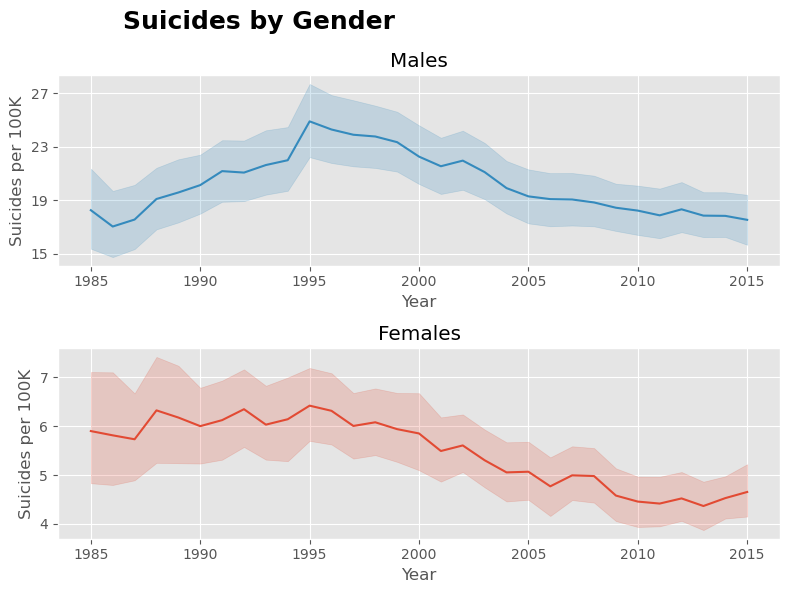

In [7]:
males = data[data.Sex == 'male']
females = data[data.Sex == 'female']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,6))

fig.suptitle('Suicides by Gender', horizontalalignment='right', fontsize=18, fontweight='bold')

sns.lineplot(x='Year', y='Suicides_per_100K', ax=ax1, data=males, color=colors[1])
ax1.set_title('Males')
ax1.set_xlabel('Year', fontsize=12, fontweight='medium')
ax1.set_ylabel('Suicides per 100K', fontsize=12, fontweight='medium')
ax1.set_yticks([15,19,23,27])

sns.lineplot(x='Year', y='Suicides_per_100K', ax=ax2, data=females, color=colors[0] )
ax2.set_title('Females')
ax2.set_xlabel('Year', fontsize=12, fontweight='medium')
ax2.set_ylabel('Suicides per 100K', fontsize=12, fontweight='medium')

fig.tight_layout()

### Generations

Text(0, 0.5, 'Suicides per 100K')

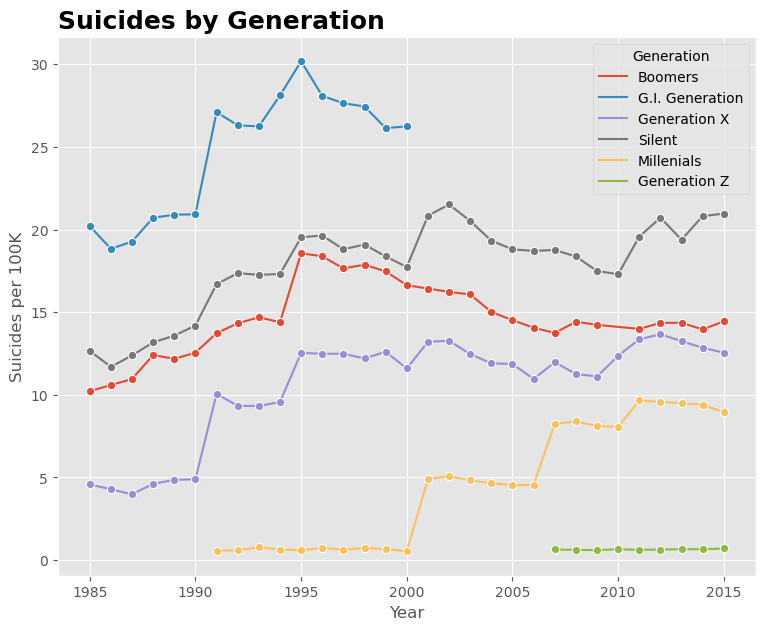

In [76]:
generations = data.groupby(['Year', 'Generation']).agg('mean').reset_index()

fig, ax = plt.subplots(figsize=(9,7))

sns.lineplot(x='Year', y='Suicides_per_100K', hue='Generation', ax=ax, data=generations, marker='o')
ax.set_title('Suicides by Generation', loc='left', fontsize=18, fontweight='bold')

ax.set_xlabel('Year', fontsize=12, fontweight='medium')
ax.set_ylabel('Suicides per 100K', fontsize=12, fontweight='medium')

### Ages

Text(0, 0.5, 'Suicides per 100K')

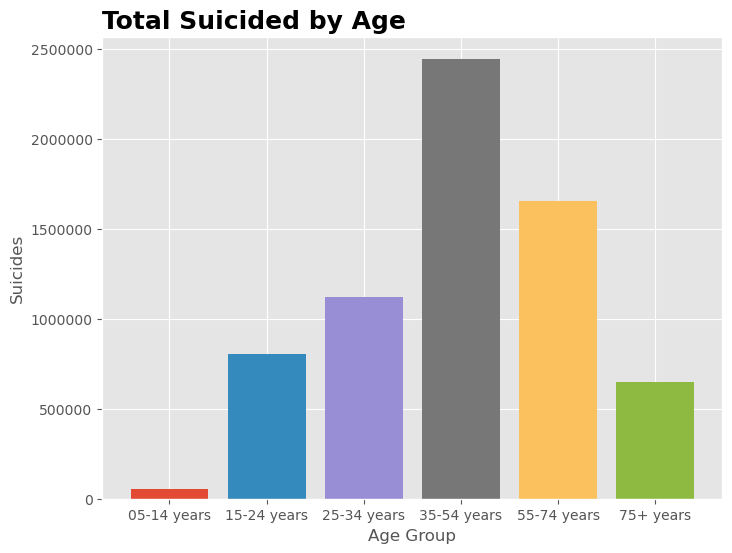

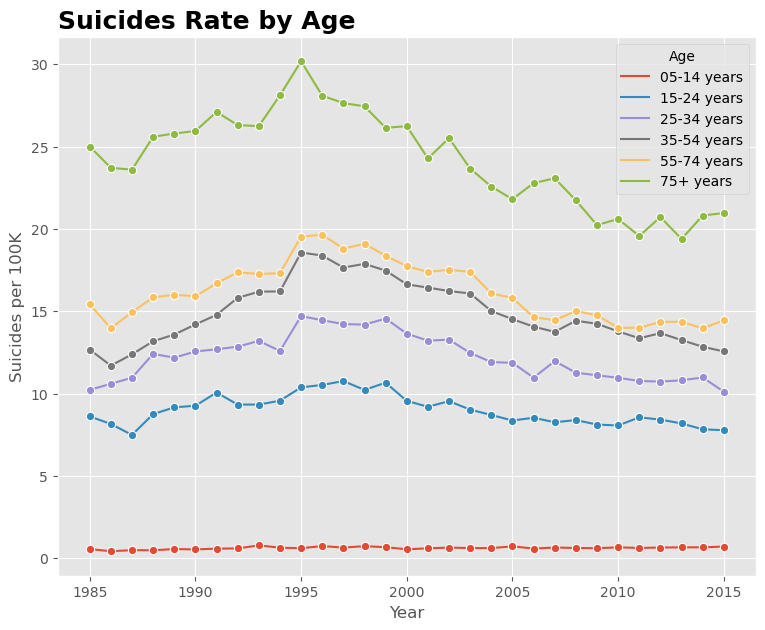

In [79]:
# ages = data.groupby(['Year', 'Age']).agg('mean').reset_index()
ages_grouped = data.groupby('Age').sum().sort_values('Age', ascending=True).reset_index()

fig, ax = plt.subplots(figsize=(8,6))
ax.ticklabel_format(useOffset=False, style='plain', axis='y')

ax.bar(ages_grouped.Age, ages_grouped.Suicides, color=colors)

ax.set_title('Total Suicided by Age', loc='left', fontsize=18, fontweight='bold')
ax.set_xlabel('Age Group', fontsize=12, fontweight='medium')
ax.set_ylabel('Suicides', fontsize=12, fontweight='medium')



ages = data.groupby(['Year', 'Age']).agg('mean').reset_index()

fig, ax = plt.subplots(figsize=(9,7))

sns.lineplot(x='Year', y='Suicides_per_100K', hue='Age', ax=ax, data=ages, marker='o')
ax.set_title('Suicides Rate by Age', loc='left', fontsize=18, fontweight='bold')

ax.set_xlabel('Year', fontsize=12, fontweight='medium')
ax.set_ylabel('Suicides per 100K', fontsize=12, fontweight='medium')




Text(0, 0.5, 'Country')

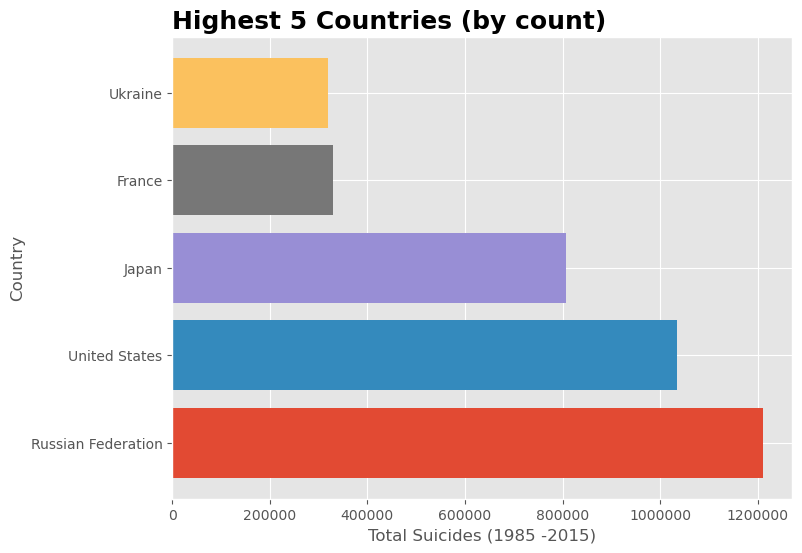

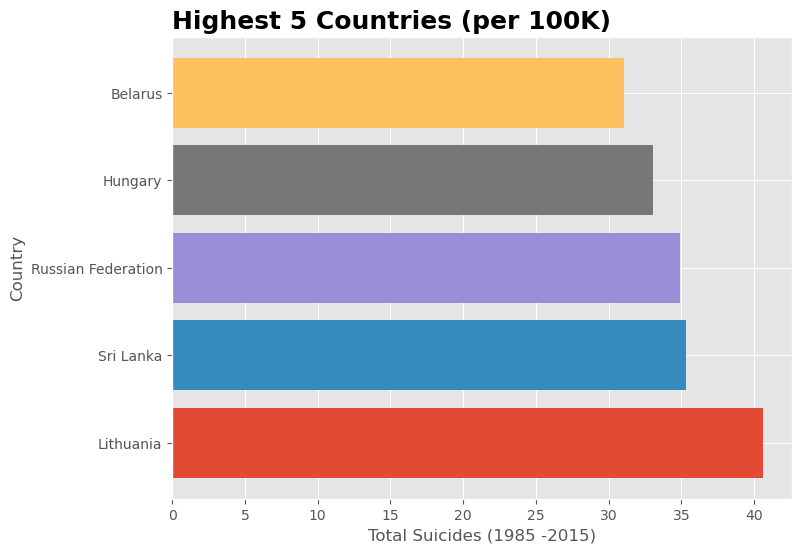

In [9]:
high_five = country_total.sort_values('Suicides', ascending=False)[:5]

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, ax = plt.subplots(figsize=(8,6))

ax.barh(high_five.Country, high_five.Suicides, color=colors)
ax.ticklabel_format(useOffset=False, style='plain', axis='x')

ax.set_title('Highest 5 Countries (by count)', loc='left', fontsize=18, fontweight='bold')
ax.set_xlabel('Total Suicides (1985 -2015)', fontsize=12, fontweight='medium')
ax.set_ylabel('Country', fontsize=12, fontweight='medium')

high_five_ratio = data['Suicides_per_100K'].groupby(data.Country).mean().sort_values(ascending=False)[:5]

fig, ax = plt.subplots(figsize=(8,6))

ax.barh(high_five_ratio.index, high_five_ratio.values, color=colors)
ax.set_title('Highest 5 Countries (per 100K)', loc='left', fontsize=18, fontweight='bold')
ax.set_xlabel('Total Suicides (1985 -2015)', fontsize=12, fontweight='medium')
ax.set_ylabel('Country', fontsize=12, fontweight='medium')